In [23]:
library(tidyverse)
library(nycflights13)
library(lubridate)
options(repr.plot.width=8, repr.plot.height=5)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Lecture 10: Importing data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand how to import data from CSV files and Excel spreadsheets.
</div>

These notes correspond to Chapters 8 and 22 of your book.


## Types of data
You will encounter data in many different formats. Here are a few of the most common ones:

### Comma-separated value data
Comma-separated value (CSV) is one of the most common formats for sharing data. It has the advantage of being human-readable. The disadvantage is that there is no actual standard for reading or writing these files!

Here's an example of CSV data on heights, education, and earnings:
    
    "earn","height","sex","ed","age","race"
    50000,74.4244387818035,"male",16,45,"white"
    60000,65.5375428255647,"female",16,58,"white"
    30000,63.6291977374349,"female",16,29,"white"
    50000,63.1085616752971,"female",16,91,"other"
    51000,63.4024835710879,"female",17,39,"white"
    9000,64.3995075440034,"female",15,26,"white"
    
The first row (usually) has a *header* giving the column names. Subsequent rows give the actual data. Strings are (usually) quoted.

You might also see these data come in the format:
    
    earn,height,sex,ed,age,race
    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No quotes!

Or even:

    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No column names!

The `read_csv` command is designed to read this type of file. Note that this command is part of `tidyverse` and is different from `read.csv` in R! You generally want to use `read_csv` over `read.csv` since:
- It is much faster.
- It outputs nicely formatted `tibble`s which you can pass into other tidyverse functions.

In [29]:
# download.file("https://datasets.stats306.org/heights.csv", "heights.csv")
heights <- read_csv("heights.csv") %>% print

Rows: 1192 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, ed, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# … with 1,182 more rows


Here `read_csv` has told us what columns it found, and also what the data types it found for them are. Generally these will be correct but we will see examples later where it guesses wrongly and we have to manually override them.

Here is another version of `heights`, where we are not lucky enough to have a header telling us which columns came from where:

In [30]:
# download.file("https://datasets.stats306.org/heights_no_hdr.csv", "heights_no_hdr.csv")
read_csv("heights_no_hdr.csv") %>% print

Rows: 1191 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): male, white
dbl (4): 50000, 74.4244387818035, 16, 45

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,191 × 6
   `50000` `74.4244387818035` male    `16`  `45` white   
     <dbl>              <dbl> <chr>  <dbl> <dbl> <chr>   
 1   60000               65.5 female    16    58 white   
 2   30000               63.6 female    16    29 white   
 3   50000               63.1 female    16    91 other   
 4   51000               63.4 female    17    39 white   
 5    9000               64.4 female    15    26 white   
 6   29000               61.7 female    12    49 white   
 7   32000               72.7 male      17    46 white   
 8    2000               72.0 male      15    21 hispanic
 9   27000               72.2 male      12    26 white   
10    6530               69.5 male      16    65 white   
# … with 1,181 more rows


Now `read_csv()` has erroneously assumed that the first row of data are the header names. To override this behavior we need to specify the column names by hand:

In [39]:
read_csv("heights_no_hdr.csv", col_names = c('earn', 'height', 'sex', 'educ', 'age', 'race'))

Rows: 1192 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, educ, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


earn,height,sex,educ,age,race
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
50000,74.42444,male,16,45,white
60000,65.53754,female,16,58,white
30000,63.62920,female,16,29,white
50000,63.10856,female,16,91,other
51000,63.40248,female,17,39,white
9000,64.39951,female,15,26,white
29000,61.65633,female,12,49,white
32000,72.69854,male,17,46,white
2000,72.03947,male,15,21,hispanic


In [15]:
read_csv("heights_no_hdr.csv", 
         col_names = c("earn", "height", "sex", "ed", "age", "race")) %>% print

Parsed with column specification:
cols(
  earn = col_double(),
  height = col_double(),
  sex = col_character(),
  ed = col_double(),
  age = col_double(),
  race = col_character()
)


# A tibble: 1,192 x 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# ... with 1,182 more rows


To create short examples illustrating `read_csv`'s behavior, we can specify the contents of a csv file inline.

In [40]:
read_csv(
    "a, b, c
     1, 2, 3
     4, 5, 6
")

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


You might want to skip a few rows in the beginning that have metadata.

In [42]:
read_csv(
"# First row to skip
// Second row to skip
% Third row to skip
a, b, c
1, 2, 3
4, 5, 6
", skip = 3)

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Some CSVs will come with comments, typically in the form of lines prefaced by `#`. You can also skip comments line by specifying a comment character.

In [44]:
read_csv("
# First comment line
a, b, c
# This separate the header from the data
1, 2, 3
4, 5, 6
# Another comment line
", comment = "#")

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Set `col_names = FALSE` when you don't have column names in the file. The column names are then set to X1, X2, ...

In [35]:
read_csv("
1, 2, 3
4, 5, 6
") %>% print

# A tibble: 1 x 3
    `1`   `2`   `3`
  <dbl> <dbl> <dbl>
1     4     5     6


You can specify your own column names.

In [101]:
read_csv("
1, 2, 3
4, 5, 6
", col_names = c("a", "b", "c"))

  a b c
1 1 2 3
2 4 5 6

You can specify how missing values are represented in the file.

In [45]:
read_csv(
    "a,b,c
     1,2,3
     4,,6
") %>% print

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


In [47]:
read_csv(
    "a, b, c
     1, 2, 3
     4, -1, 6
", na = "-1") %>% print

Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


## Exercises

What's wrong with each of the following CSV files?

In [52]:
csv <- "
a,b
1,2,3
4,5,6"

read_csv(csv)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): a
num (1): b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,23
4,56


In [55]:
csv <- "
a,b,c
1,2
1,2,3,4"

df <- read_csv(csv)
problems(df)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): a, b
num (1): c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
2,2,3 columns,2 columns,/tmp/Rtmp5oewRD/file13461e6d23b2aa
3,4,3 columns,4 columns,/tmp/Rtmp5oewRD/file13461e6d23b2aa


In [59]:
csv <- "a,b\n\"1"

writeLines(csv)

read_csv(csv)

a,b
"1


Rows: 0 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>


In [61]:
csv <- "
a,b
1,2
a,b"

read_csv(csv) %>% mutate(a = as.integer(a))

Rows: 2 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `a = as.integer(a)`.
Caused by warning:
! NAs introduced by coercion”


a,b
<int>,<chr>
1,2
NA,b


In [68]:
tsv <- "
a\tb
1\t3
"

# writeLines(tsv)

read_delim(tsv)

Rows: 1 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,3


## Example of a real-world CSV

![nytimes china story](https://i.imgur.com/c0KGOZ8.png)


Recently we saw in the news that the population of China shrank for the first time in more than sixty years. This has major implications for China and the world as a whole. 

Let's study this phenomenon in data, which will give us a chance to practice importing CSV and Excel files.

First I visited the World Bank. They have data on total population size as well as fertility rates across all countries, from about the 1950s to present:
- [Population](https://data.worldbank.org/indicator/SP.POP.TOTL)
- [Fertility rate](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN)


Each of these web pages contains a link to a downloadable CSV file. You can download them to your local computer by running the following code:

In [27]:
for(x in c('fert', 'pop')) {
    fn <- paste0('wb_', x, '.csv')
    download.file(paste0('https://datasets.stats306.org/', fn), fn)
}

First let's try loading the population dataset into R using `read_csv`:

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (62): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


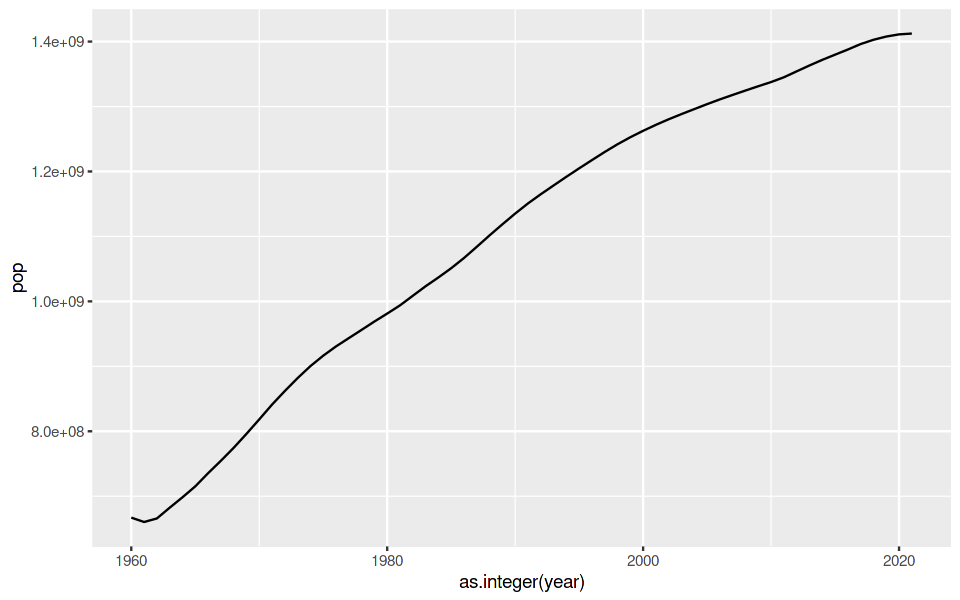

In [84]:
read_csv('wb_pop.csv', skip=4) %>% pivot_longer(`1960`:`2021`, names_to = "year", values_to = "pop") %>% 
    filter(`Country Name` == "China") %>% ggplot(aes(x = as.integer(year), y = pop, group = `Country Name`)) + geom_line()

# problems(wb_pop)

We can see that R generated some warning messages when loading the CSV. And the data frame itself does not appear to have loaded correctly:

The `problems()` function can be helpful for diagnosing what went wrong:

In [11]:
# problems loading wb_pop

Let's try examining the [raw CSV file](wb_pop.csv):

We can see that the first three lines of the file contain metadata about the source of the data. We need to tell R to skip those so that the first row it considers contains the column names:

In [31]:
# read in the csv, skip first rows
wb.pop <- read_csv("wb_pop.csv", skip=3)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (62): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Notice that there is also an extraneous 67-th column added to the very end of the data frame. This is because the rows of `wb_pop` all end in a comma.

In [53]:
# load fertility dataset, using same ideas

What do these data tell us about falling birth rates in China?

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


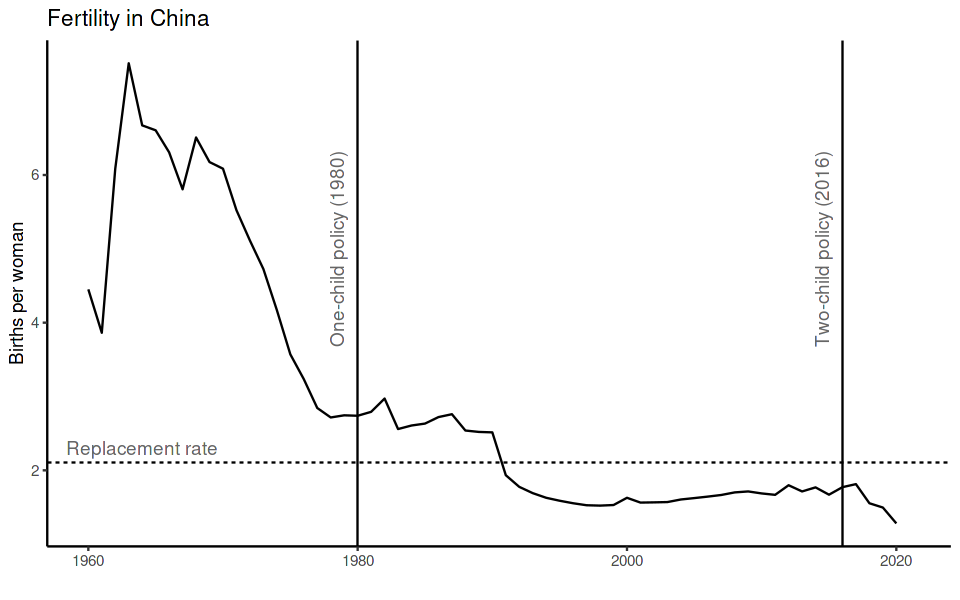

In [131]:
# fertility over time in China

In [55]:
# plot china population and fertility using sec.axis()

## Reading data from spreadsheets

Next we will continue our investigation in the population in China by turning to a different data source. The United Nations maintains a database called the [World Population Prospects](https://population.un.org/wpp/) which contains very detailed historical and forecasted demographic information for every country. We will use this dataset to learn more about the demographics of China.

The main file we are interested is the "compact" version of the dataset. You can download it into your R workspace by running:

In [ ]:
wpp.url <- "https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_General/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx",
download.file(wpp.url, "WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx")

The `readxl` package (part of tidyverse) is used to read Excel files. It provides a command called `read_excel` which we will use to read Excel spreadsheet data into R.

In [76]:
library(readxl)
wpp <- read_excel("WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx")

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -> `...63`
• `` 

It's clear that this import did not work well:

In [77]:
head(wpp)

...1,...2,...3,...4,United Nations,...6,...7,...8,...9,...10,⋯,...56,...57,...58,...59,...60,...61,...62,...63,...64,...65
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,Population Division,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,Department of Economic and Social Affairs,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,World Population Prospects 2022,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,"File GEN/01/REV1: Demographic indicators by region, subregion and country, annually for 1950-2100",NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,"Estimates, 1950 - 2021",NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


It turns out that this is a really big spreadsheet containing a lot of data, and it's not in a format we can easily import. To understand how best to import it, it helps to look at it in Excel for a time:

We can see that:
- The column names are spread across multiple rows.
- There are thousands of rows of data, but we only care about a small number of them (those pertaining to China).
- Similarly, there are hundreds of columns of data, but we only care about a small number of them. 

First, we need to skip a large number of initial rows which contain sourcing information. We can do that using the `skip=` option.

In [101]:
# # read file, skipping rows
# library(readxl)
# wpp <- read_excel("WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx", col_names = F, range = "A6790:BM6861")
# wpp.cols <- read_excel("WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx", skip = 16, n_max = 2)
# colnames(wpp) <- colnames(wpp.cols)
colnames(wpp)

[1] "Index"                                                                                         
 [2] "Variant"                                                                                       
 [3] "Region, subregion, country or area *"                                                          
 [4] "Notes"                                                                                         
 [5] "Location code"                                                                                 
 [6] "ISO3 Alpha-code"                                                                               
 [7] "ISO2 Alpha-code"                                                                               
 [8] "SDMX code**"                                                                                   
 [9] "Type"                                                                                          
[10] "Parent code"                                                                                   
[11] "Year"                                                                                          
[12] "Total Population, as of 1 January (thousands)"                                                 
[13] "Total Population, as of 1 July (thousands)"                                                    
[14] "Male Population, as of 1 July (thousands)"                                                     
[15] "Female Population, as of 1 July (thousands)"                                                   
[16] "Population Density, as of 1 July (persons per square km)"                                      
[17] "Population Sex Ratio, as of 1 July (males per 100 females)"                                    
[18] "Median Age, as of 1 July (years)"                                                              
[19] "Natural Change, Births minus Deaths (thousands)"                                               
[20] "Rate of Natural Change (per 1,000 population)"                                                 
[21] "Population Change (thousands)"                                                                 
[22] "Population Growth Rate (percentage)"                                                           
[23] "Population Annual Doubling Time (years)"                                                       
[24] "Births (thousands)"                                                                            
[25] "Births by women aged 15 to 19 (thousands)"                                                     
[26] "Crude Birth Rate (births per 1,000 population)"                                                
[27] "Total Fertility Rate (live births per woman)"                                                  
[28] "Net Reproduction Rate (surviving daughters per woman)"                                         
[29] "Mean Age Childbearing (years)"                                                                 
[30] "Sex Ratio at Birth (males per 100 female births)"                                              
[31] "Total Deaths (thousands)"                                                                      
[32] "Male Deaths (thousands)"                                                                       
[33] "Female Deaths (thousands)"                                                                     
[34] "Crude Death Rate (deaths per 1,000 population)"                                                
[35] "Life Expectancy at Birth, both sexes (years)"                                                  
[36] "Male Life Expectancy at Birth (years)"                                                         
[37] "Female Life Expectancy at Birth (years)"                                                       
[38] "Life Expectancy at Age 15, both sexes (years)"                                                 
[39] "Male Life Expectancy at Age 15 (years)"                                                        
[40] "Female Life Expec

In [91]:
?read_excel

Next, we will only load the rows that are about China. 
(We can easily find these using Excel and the "filter" command:)

In [91]:
# read wpp excel, subset china

(Or, we could have just loaded the entire dataset and used `filter()` but this is slower.)

## Understanding demographic change in China
Finally, we can use these data to study more factors that contributed to declining fertility rates in China.

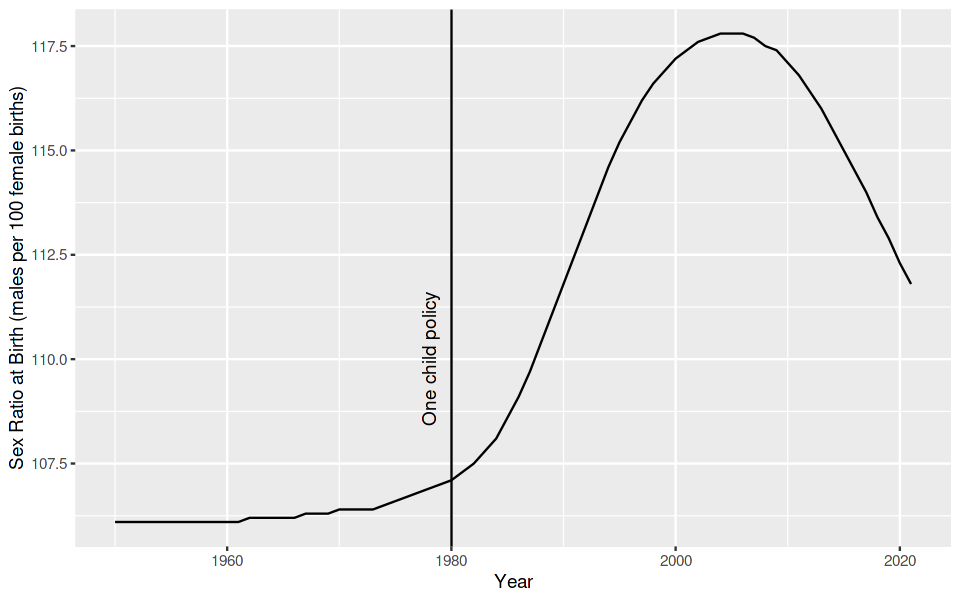

In [107]:
# sex ratio at birth over time
ggplot(wpp, aes(x = Year, y=`Sex Ratio at Birth (males per 100 female births)`)) + geom_line() +
    geom_vline(xintercept = 1980) + 
    annotate(x = 1978, y = 110, label = "One child policy", angle = 90, geom="text")


In [ ]:
# dependency ratio over time



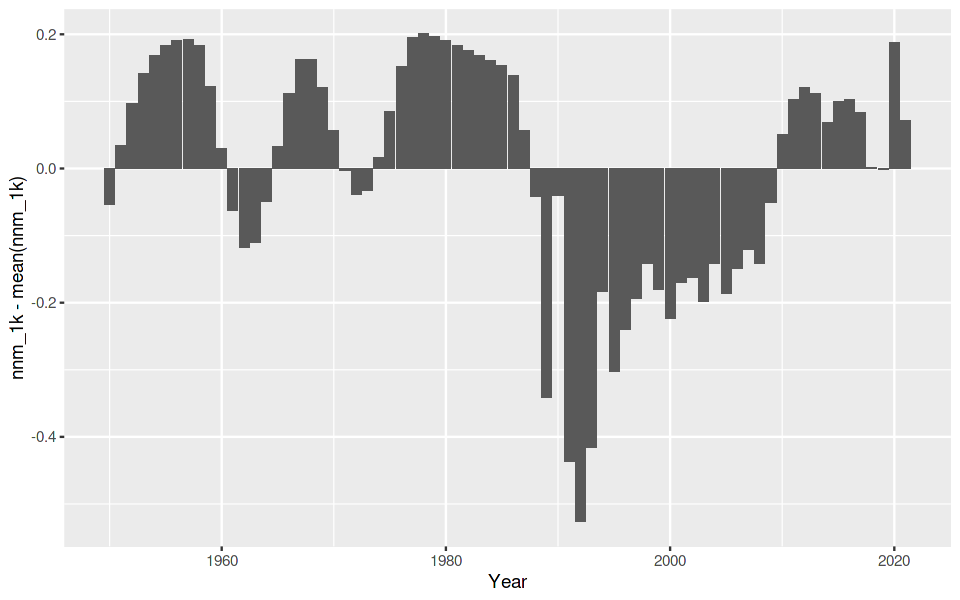

In [114]:
# net number of migrants over time

wpp  %>% select(Year, nnm = `Net Number of Migrants (thousands)`, nnm_1k = `Net Migration Rate (per 1,000 population)`) %>% 
    ggplot(aes(x = Year, y = nnm_1k - mean(nnm_1k))) + geom_col()